# Telco Customer Churn Classification

### Problem Statement :

In the telecom industry, customers are able to choose from a pool of companies to cater their needs regarding communication and internet. Customers are very critical about the kind of services they receive and judge the enitre company based on a single experience. These communication services have become so recurrent and inseparable from the daily routine that a 30 minute maintenance break kicks in anxiety in the users highlighting our taken-for-granted attitude towards these services. Coupled with high customer acquisation costs, churn analysis becomes very pivotal. Churn rate is a metric that describes the number of customers that cancelled or did not renew their subscription with the company. Thus, higher the churn rate, more customers stop buying from your business, directly affecting the revenue! Hence, based on the insights gained from the churn analysis, companies can build strategies, target segments, improve the quality of the services being provided to improve the customer experience, thus cultivating trust with the customers. That is why building predictive models and creating reports of churn analysis becomes key that paves the way for growth.


### Aim :
- To classify the potential churn customers based on numerical and categorical features.

### Dataset Attributes :
    
- **customerID** : Customer ID
- **gender** : Whether the customer is a male or a female
- **SeniorCitizen** : Whether the customer is a senior citizen or not (1, 0)
- **Partner** : Whether the customer has a partner or not (Yes, No)
- **Dependents** : Whether the customer has dependents or not (Yes, No)
- **tenure** : Number of months the customer has stayed with the company
- **PhoneService** : Whether the customer has a phone service or not (Yes, No)
- **MultipleLines** : Whether the customer has multiple lines or not (Yes, No, No phone service)
- **InternetService** : Customer’s internet service provider (DSL, Fiber optic, No)
- **OnlineSecurity** : Whether the customer has online security or not (Yes, No, No internet service)
- **OnlineBackup** : Whether the customer has online backup or not (Yes, No, No internet service)
- **DeviceProtection** : Whether the customer has device protection or not (Yes, No, No internet service)
- **TechSupport** : Whether the customer has tech support or not (Yes, No, No internet service)
- **StreamingTV** : Whether the customer has streaming TV or not (Yes, No, No internet service)
- **StreamingMovies** : Whether the customer has streaming movies or not (Yes, No, No internet service)
- **Contract** : The contract term of the customer (Month-to-month, One year, Two year)
- **PaperlessBilling** : Whether the customer has paperless billing or not (Yes, No)
- **PaymentMethod** : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **MonthlyCharges** : The amount charged to the customer monthly
- **TotalCharges** : The total amount charged to the customer
- **Churn** : Whether the customer churned or not (Yes or No)

## Dataset Information

### Import Necessary Libraries

In [19]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score,recall_score, precision_score
from sklearn.metrics import average_precision_score, roc_auc_score, roc_curve, auc
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.metrics import plot_roc_curve
from sklearn import metrics
from numpy import loadtxt, where, zeros, e, array, log, ones, append, linspace
from sklearn.preprocessing import PolynomialFeatures
import scipy.optimize

import warnings
warnings.filterwarnings("ignore")

In [20]:
data = pd.read_csv("Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
data.shape

(7043, 21)

In [22]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


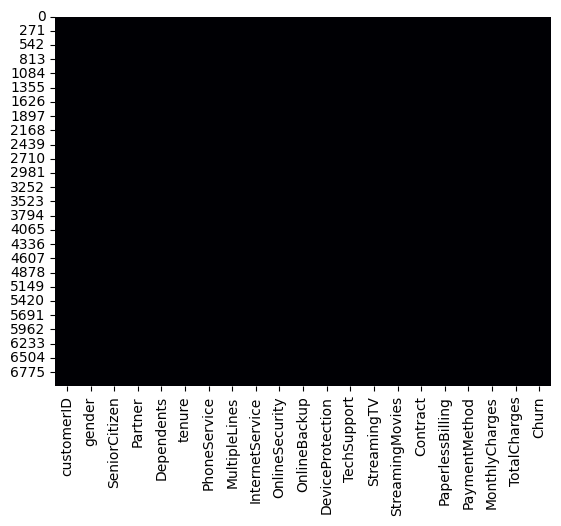

In [24]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

- **No null values** present in the data!

In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


- The dataset has too many features with text data and are probably categorical features!
- **Total Charges** is a feature with numerical values but are stored in string datatype.

Drop the **customerID** column.

In [26]:
data.drop(['customerID'], axis=1, inplace=True)


In [27]:
# Converting DataFrame column elements from string to float using the following code line :
# data['TotalCharges'] = data['TotalCharges'].astype(float)

- **Total Charges** is a feature with numerical values but are stored in string datatype. 
- While converting the **TotalCharges** to float, an error occurred with the message describing that it could not convert string to float.
- There is empty strings present in the some **TotalCharges** columns. As these elements were defined as string, they did not appear as **Null** values and hence the heatmap for missing values did not display anything.
    - **E.g** : a = ' ' 

In [28]:
data.TotalCharges.value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [29]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan, regex=True)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [30]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [31]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [32]:
print("Mode: {}".format(data.TotalCharges.mode()))
print("Mean: {}".format(data.TotalCharges.mean()))
print("Median: {}".format(data.TotalCharges.median()))

Mode: 0    20.2
dtype: float64
Mean: 2283.3004408418656
Median: 1397.475


In [33]:
data['TotalCharges'] = data['TotalCharges'].fillna(data.TotalCharges.median())

In [34]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Dividing features into Numerical and Categorical :

In [90]:
df1 = data.copy(deep = True)
col = list(df1.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)


Categorical Features : gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn
Numerical Features : tenure MonthlyCharges TotalCharges


In [91]:
le = LabelEncoder()

df1 = data.copy(deep = True)
text_data_features = [i for i in list(data.columns) if i not in list(data.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


- We creating a deep copy of the orginal dataset and label encoding the text data.
- Modifications in the original dataset will not be highlighted in this deep copy.
- Hence, we use this deep copy of dataset that has all the features converted into numerical values for visualization & modeling purposes.
- We now again the descriptive stats of the data.

In [92]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [93]:
df1.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2281.916928,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.270398,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


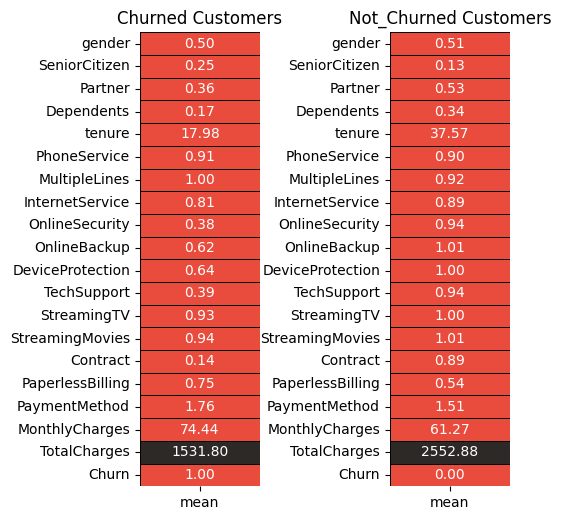

In [94]:
colors = ['#E94B3C','#2D2926']

churn = df1[df1['Churn'] == 1].describe().T
not_churn = df1[df1['Churn'] == 0].describe().T

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Churned Customers');

plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Not_Churned Customers');

fig.tight_layout(pad = 0)

- **Mean** values of all the features for churned and not-churned customers.
- Clearly, the customers that churned had a low mean **tenure** of **17.98** months as compared to those who continued with an average **tenure** period of **37.57** months. 
- Mean values of **OnlineSecurity**, **OnlineBackup**, **DeviceProtection** and **TechSupport** are higher for not-churned customers than churn customers. This can serve as a good indicator or point to focus on!
- Churned customer's **Contract** value is much smaller than those of not-churned customers.
- Mean **MonthlyCharges** of the churn customers, **74.44**, is more than that of not-churn customers, **61.27**.
- Not-churned customers **TotalCharges**, **2552.88**, is higher than churn customers, **1531.80**.
- From these mean values, we can say that some of the features display a clear cut difference that can help to focus more churn customers to make sure they retain the services.
- The dataset has too many categorical features, hence mean values of the features are present in the vicinity of 0.

### Target Variable Visualization (Churn) : 

0    5174
1    1869
Name: Churn, dtype: int64

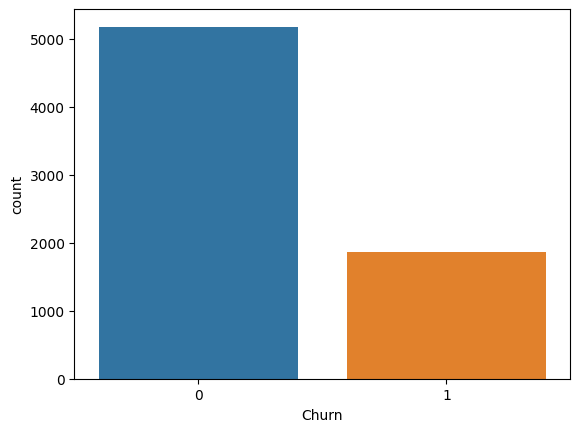

In [95]:
sns.countplot(x = "Churn", data = df1)
df1.loc[:, 'Churn'].value_counts()

- The dataset is **unbalanced**.
- Due to this, predictions will be biased towards **Not-Churn** customers.
- Visualizations will also display this bias!

### Feature Engineering

### Numerical Features :

#### Distribution of Numerical Features :

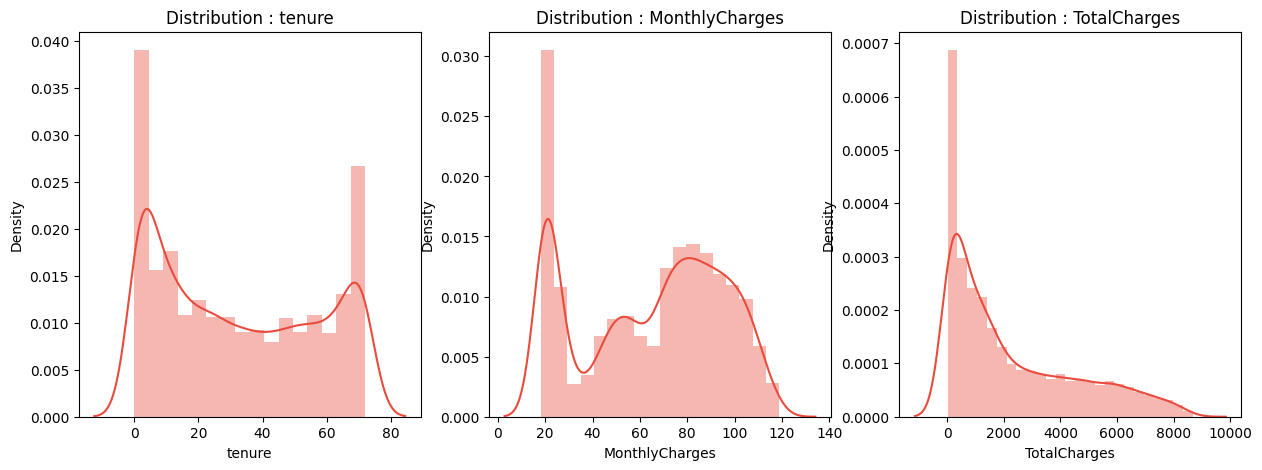

In [96]:
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(len(numerical_features)):
    plt.subplot(1,3,i+1)
    sns.distplot(df1[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

- **tenure** and **MonthlyCharges** kind of create a **bimodal distribution** with peaks present at **0 - 70** and **20 - 80** respectively.
- **TotalCharges** displays a **positively or rightly skewed distribution**.

In [97]:
x = df1.drop("Churn", axis = 1)
y = df1['Churn']

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state =100 ,stratify=y, test_size = 0.2)
print(y_train.value_counts())

0    4139
1    1495
Name: Churn, dtype: int64


In [99]:
scale = MinMaxScaler()
col = x_train.columns

x_train[col] = scale.fit_transform(x_train[col])
x_test[col] = scale.transform(x_test[col])

- Machine learning model does not understand the units of the values of the features. It treats the input just as a simple number but does not understand the true meaning of that value. Thus, it becomes necessary to scale the data.

****Eg :** Age = Years; FastingBS = mg / dl; Charges = Currency 

- We have 2 options for data scaling : 1) **Normalization** 2) **Standardization**. As most of the algorithms assume the data to be normally (Gaussian) distributed, **Normalization** is done for features whose data does not display normal distribution and **standardization** is carried out for features that are normally distributed where their values are huge or very small as compared to other features.


- **Normalization** is applied and **Standardization** is not applied here. 

### Correlation Matrix :

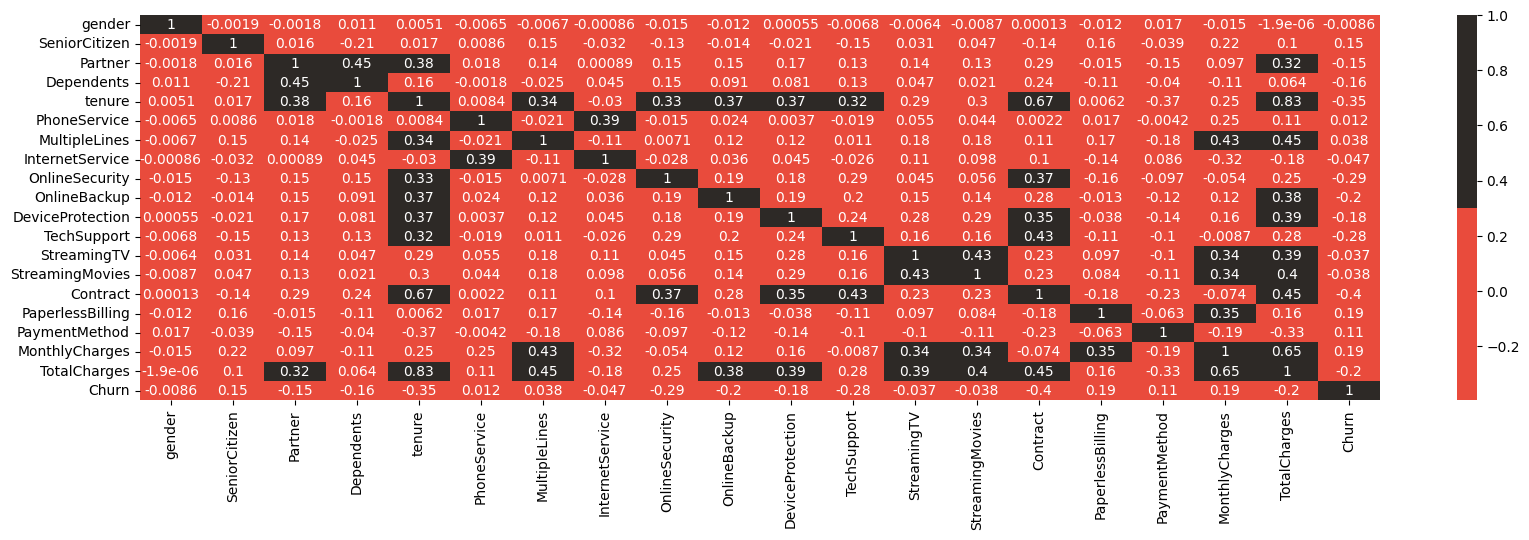

In [100]:
plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(),cmap = colors,annot = True);

- It is a huge matrix with too many features. We will check the correlation only with respect to **Churn**. 

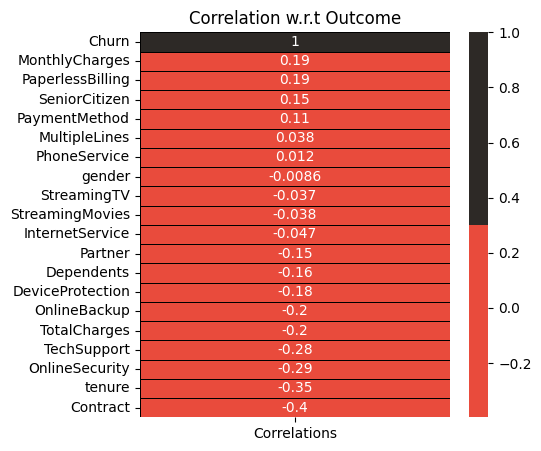

In [101]:
corr = df1.corrwith(df1['Churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Outcome');

- **MulipleLines**, **PhoneService**, **gender**, **StreamingTV**, **StreamingMovies** and **InternetService** does not display any kind of correlation. We drop the features with correlation coefficient between **(-0.1,0.1)**.
- Remaining features either display a significant **positive or negative correlation**.

### Feature Selection for Categorical Features :

#### Chi-Squared Test :

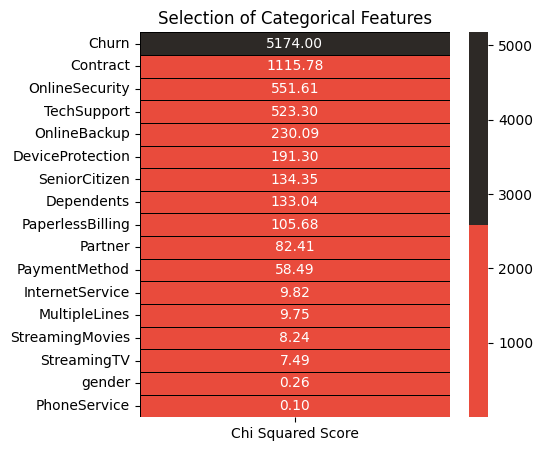

In [102]:
features = df1.loc[:,categorical_features]
target = df1.loc[:,'Churn']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

- **PhoneService**, **gender**, **StreamingTV**, **StreamingMovies**, **MultipleLines** and **InternetService** display a very low relation with **Churn**.

### Feature Selection for Numerical Features :

#### ANOVA Test :

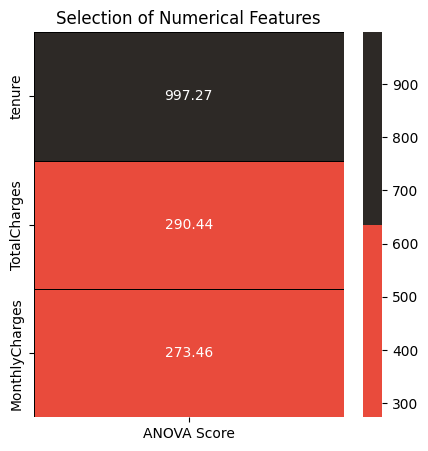

In [103]:
features = df1.loc[:,numerical_features]
target = df1.loc[:,'Churn']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

- According to the **ANOVA test**, **higher the value of the ANOVA score, higher the importance of the feature**.
- From the above results, we need to include all the numerical features for modeling.

In [104]:
df1.drop(columns = ['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'],inplace = True)

df1.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,2,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,2,0,2,0,1,0,3,56.95,1889.50,0
2,0,0,0,2,2,2,0,0,0,1,3,53.85,108.15,1
3,0,0,0,45,2,0,2,2,1,0,0,42.30,1840.75,0
4,0,0,0,2,0,0,0,0,0,1,2,70.70,151.65,1


In [105]:
x_train_copy = x_train.copy()
x_test_copy = x_test.copy()
y_train_copy = y_train.copy()
y_test_copy = y_test.copy()

### Evaluation Models

- **Decision Tree**, **Random Forest**, **Logistic Regression** models will be used.
- For balancing data, **RandomOverSampler** and **RandomUnderSampler** will be used.




In [106]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()
    

def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))



### Without Data Balancing

### Decision Tree

In [107]:
x_train_dt = x_train.copy()
y_train_dt = y_train.copy()
x_test_dt = x_test.copy()
y_test_dt = y_test.copy()

In [108]:

classifier_dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4, min_samples_split=5, random_state=0) #olabilir



Cross Validation Score :  82.85%
ROC_AUC Score :  72.89%


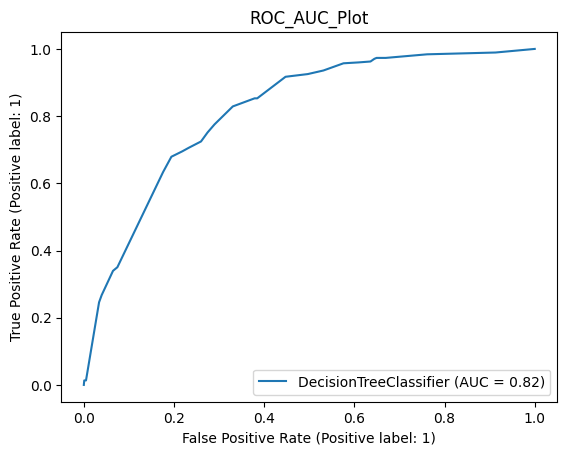

In [109]:
model(classifier_dt,x_train_dt,y_train_dt,x_test_dt,y_test_dt)


              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1035
           1       0.57      0.63      0.60       374

    accuracy                           0.77      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.77      0.78      1409



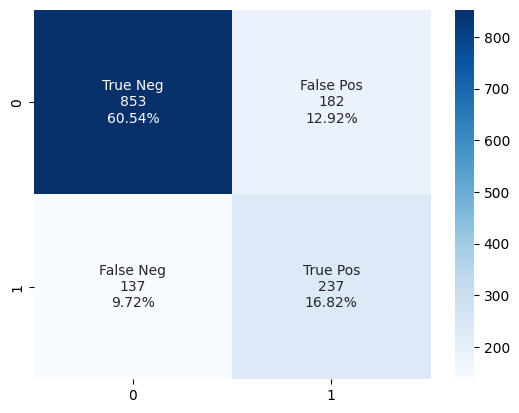

In [110]:
model_evaluation(classifier_dt,x_test_dt,y_test_dt)

### Random Forest

In [111]:
x_train_rf = x_train.copy()
y_train_rf = y_train.copy()
x_test_rf = x_test.copy()
y_test_rf = y_test.copy()

In [112]:
classifier_rf = RandomForestClassifier(criterion='entropy', min_samples_leaf=3,min_samples_split=5, 
                            n_estimators=200, random_state=0)

Cross Validation Score :  84.41%
ROC_AUC Score :  68.65%


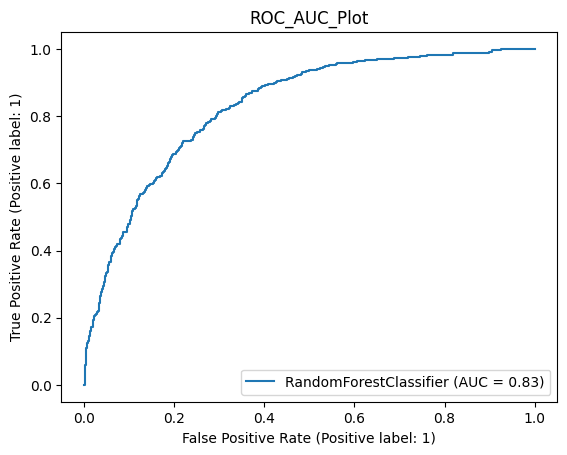

In [113]:
model(classifier_rf,x_train_rf,y_train_rf,x_test_rf,y_test_rf)


              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.47      0.54       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409



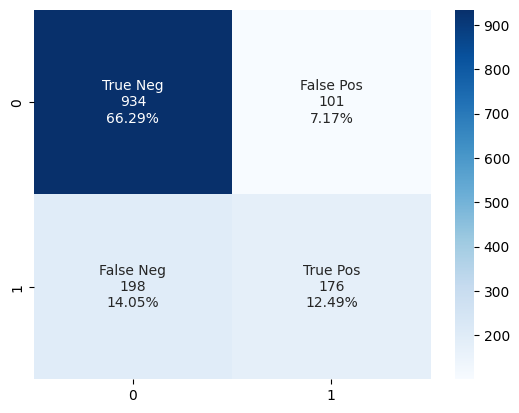

In [114]:
model_evaluation(classifier_rf,x_test_rf,y_test_rf)

### Logistic Regression Classification implementation

Logistic regression includes following functions:

- Sigmoid function
- Cost function
- Gradient descent function. This function returns the best parameters that minimizes our cost function.
- Predict function for predicting churn. When our sigmoid function outputs a value more than or equal to 0.5, it will output 1 for "Yes", and if the value is less than 0.5, it will output "0" for "No".

In [115]:
x_train_lr = x_train.copy()
y_train_lr = y_train.copy()
x_test_lr = x_test.copy()
y_test_lr = y_test.copy()

In [116]:
# logistic function = sigmoid function
def sigmoid(z):
    g = 1 / (1 + (np.exp(-z)))
    return g

# costFunction with regularization
def costFunction(theta, x, y, l):
    #initializing terms
    m = len(x)
    h = sigmoid(x.dot(theta.reshape(-1,1)))
    #cost function
    J = (1 / m) * (-y.transpose().dot(np.log(h)) - (np.subtract(1, y)).transpose().dot(np.log(1-h))) + ( l / (2*m)) * np.sum(np.power((theta[1:]), 2))
    return(J[0])

# to minimize my cost, I used Gradient Descent just like in Linear Regression implementation.
def gradDescent(theta, x, y, l): 
    #setting variables m
    m = len(x)
    h = sigmoid(x.dot(theta.reshape(-1,1)))
    #grad = (1/m) * x.transpose().dot(h - y) + (np.sum(((l / m) * theta[1:])))
    grad = (1/m) * x.transpose().dot(h - y.reshape(-1,1)) + (np.sum(((l / m) * theta[1:])))

    grad[0] = 0
    return(grad.flatten())

In [117]:
# introducting polynomial features to our dataset
# I see that this method generally used before applying logistic regression

# x_train_new_randOverSample, y_train_randOverSample, x_test_new_randOverSample
poly = PolynomialFeatures(2)

x_train_lr = poly.fit_transform(x_train_lr)
x_test_lr = poly.fit_transform(x_test_lr)


#Set regularization parameter lambda
l = 0.01

#adding intercept term to x_train set    
intercept = np.ones((x_train_lr.shape[0], 1))
x_train_lr = np.hstack((intercept, x_train_lr))

#initializing theta
initial_theta = np.random.rand(x_train_lr.shape[1], 1)

#finding optimum parameters with fmin_bfgs
#import scipy.optimize


optimized_theta = scipy.optimize.fmin_bfgs(costFunction, fprime = gradDescent, x0 = initial_theta, args=(x_train_lr, y_train_lr.ravel(), l))
optimized_theta

         Current function value: 0.394974
         Iterations: 432
         Function evaluations: 500
         Gradient evaluations: 490


array([ 6.93967111e-01, -6.57986276e-01,  1.10573577e-01, -1.48988700e-01,
        1.71691416e-01, -1.83672977e-01, -5.15300381e+00, -2.46638498e-01,
        4.23793054e-02,  1.28357180e+00, -1.31016997e+00, -1.31771824e+00,
       -1.12974746e+00, -7.02883147e-01, -1.05371735e+00, -1.11662240e+00,
       -2.23213872e+00,  1.90112123e-01,  5.94702192e-01,  8.82234970e-02,
       -1.81266773e+00,  5.63478753e-02, -1.28286535e-01,  2.46242908e-02,
       -1.44736316e-01, -1.46095629e+00,  1.97298191e-01,  2.85173214e-01,
       -2.65228865e-01, -4.62049736e-01,  4.68081505e-02, -5.68117149e-02,
       -2.73272634e-01,  9.64255289e-02, -4.26348387e-02,  3.41108443e-01,
       -5.30508953e-02,  3.35208553e-01, -9.07236853e-01,  2.73006892e+00,
        4.22644320e-01,  2.50122300e-01, -6.02622915e-01,  2.83334604e-01,
        4.86917039e-01,  3.06665622e-01, -5.78762607e-01,  2.14943006e-01,
        2.68588476e-02, -1.51963849e-01, -1.59395810e-01, -7.46160308e-02,
        8.32970754e-02, -

In [118]:
#creating our predict function for logistic regression
def predict(theta, x):
    # When our sigmoid function output value more than or equal to 0.5, it will output 1 for "Yes",
    # and if the value is less than 0.5, it will output "0" for No.
    h = sigmoid(x.dot(theta.reshape(-1,1)))
    p = np.zeros((x.shape[0],1))

    for i in range(0, h.shape[0]):
        if h[i] >= 0.5:
            p[i,0] = 1
        else:
            p[i,0] = 0
    return p

y_pred = predict(optimized_theta, x_train_lr)

#adding intercept term
intercept = np.ones((x_test_lr.shape[0], 1))
x_test_lr = np.hstack((intercept, x_test_lr))

y_cv = predict(optimized_theta, x_test_lr)

### Evaluate implemented model :

In [119]:

#classification report for cross validation set
print(classification_report(y_train_lr, y_pred)) 

print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_train_lr, y_pred)))



              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4139
           1       0.68      0.56      0.62      1495

    accuracy                           0.81      5634
   macro avg       0.77      0.73      0.75      5634
weighted avg       0.81      0.81      0.81      5634

ROC_AUC Score :  73.30%


### With Data Balancing

### Random Over Sampler

In [120]:
x_train_randomOverSampler = x_train.copy()
y_train_randomOverSampler = y_train.copy()
x_test_randomOverSampler = x_test.copy()
y_test_randomOverSampler = y_test.copy()

In [121]:
print("Before OverSampling- counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling- counts of label '0': {} \n".format(sum(y==0)))
print("*******************************************************************")

ros = RandomOverSampler()
x_train_randomOverSampler, y_train_randomOverSampler = ros.fit_resample(x_train_randomOverSampler, y_train_randomOverSampler.ravel())

print('After OverSampling with RandomOverSampler- x_train: {}'.format(x_train_randomOverSampler.shape))
print('After OverSampling with RandomOverSampler- y_train: {} \n'.format(y_train_randomOverSampler.shape))

print("After OverSampling with RandomOverSampler- counts of label '1': {}".format(sum(y_train_randomOverSampler==1)))
print("After OverSampling with RandomOverSampler- counts of label '0': {}".format(sum(y_train_randomOverSampler==0)))

Before OverSampling- counts of label '1': 1869
Before OverSampling- counts of label '0': 5174 

*******************************************************************
After OverSampling with RandomOverSampler- x_train: (8278, 19)
After OverSampling with RandomOverSampler- y_train: (8278,) 

After OverSampling with RandomOverSampler- counts of label '1': 4139
After OverSampling with RandomOverSampler- counts of label '0': 4139


### Decision Tree

In [122]:
x_train_dt = x_train_randomOverSampler.copy()
y_train_dt = y_train_randomOverSampler.copy()
x_test_dt = x_test_randomOverSampler.copy()
y_test_dt = y_test_randomOverSampler.copy()

In [123]:

classifier_dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4, min_samples_split=5, random_state=0) #olabilir


Cross Validation Score :  84.51%
ROC_AUC Score :  72.89%


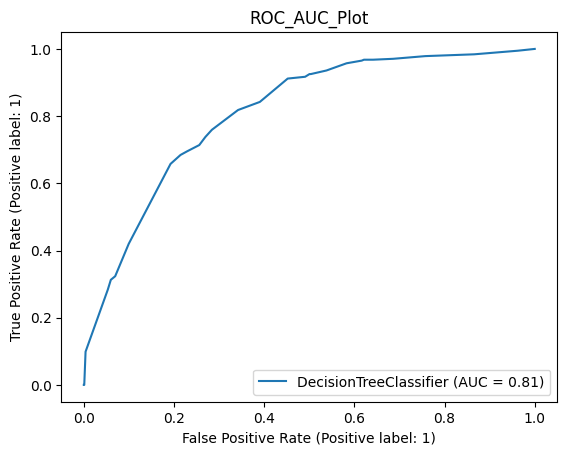

In [124]:

model(classifier_dt,x_train_dt,y_train_dt,x_test_dt,y_test_dt)

              precision    recall  f1-score   support

           0       0.88      0.74      0.81      1035
           1       0.50      0.71      0.59       374

    accuracy                           0.74      1409
   macro avg       0.69      0.73      0.70      1409
weighted avg       0.78      0.74      0.75      1409



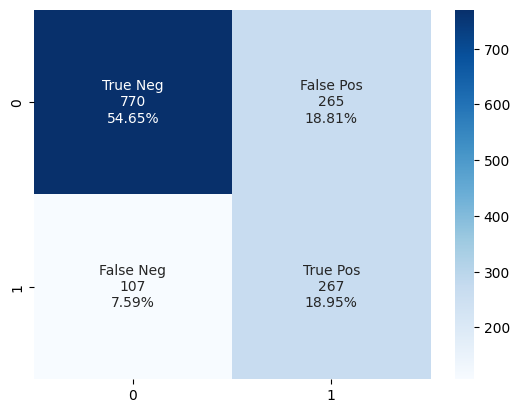

In [125]:

model_evaluation(classifier_dt,x_test_dt,y_test_dt)

### Random Forest

In [126]:
x_train_rf = x_train_randomOverSampler.copy()
y_train_rf = y_train_randomOverSampler.copy()
x_test_rf = x_test_randomOverSampler.copy()
y_test_rf = y_test_randomOverSampler.copy()

In [127]:
classifier_rf = RandomForestClassifier(criterion='entropy', min_samples_leaf=3,min_samples_split=5, 
                            n_estimators=200, random_state=0)

Cross Validation Score :  93.74%
ROC_AUC Score :  73.49%


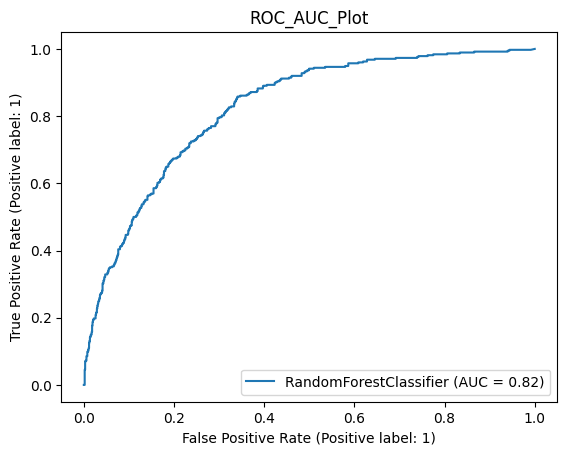

In [128]:
model(classifier_rf,x_train_rf,y_train_rf,x_test_rf,y_test_rf)


              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1035
           1       0.54      0.68      0.60       374

    accuracy                           0.76      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.76      0.77      1409



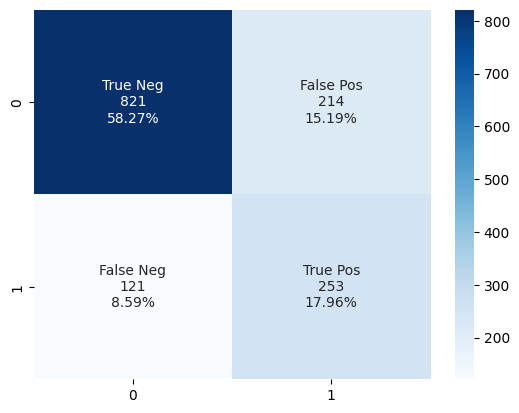

In [129]:
model_evaluation(classifier_rf,x_test_rf,y_test_rf)


### Logistic Regression Classification implementation

Logistic regression includes following functions:

- Sigmoid function
- Cost function
- Gradient descent function. This function returns the best parameters that minimizes our cost function.
- Predict function for predicting churn. When our sigmoid function outputs a value more than or equal to 0.5, it will output 1 for "Yes", and if the value is less than 0.5, it will output "0" for "No".

In [130]:
x_train_lr = x_train_randomOverSampler.copy()
y_train_lr = y_train_randomOverSampler.copy()
x_test_lr = x_test_randomOverSampler.copy()
y_test_lr = y_test_randomOverSampler.copy()

In [131]:
# logistic function = sigmoid function
def sigmoid(z):
    g = 1 / (1 + (np.exp(-z)))
    return g

# costFunction with regularization
def costFunction(theta, x, y, l):
    #initializing terms
    m = len(x)
    h = sigmoid(x.dot(theta.reshape(-1,1)))
    #cost function
    J = (1 / m) * (-y.transpose().dot(np.log(h)) - (np.subtract(1, y)).transpose().dot(np.log(1-h))) + ( l / (2*m)) * np.sum(np.power((theta[1:]), 2))
    return(J[0])

# to minimize my cost, I used Gradient Descent just like in Linear Regression implementation.
def gradDescent(theta, x, y, l): 
    #setting variables m
    m = len(x)
    h = sigmoid(x.dot(theta.reshape(-1,1)))
    #grad = (1/m) * x.transpose().dot(h - y) + (np.sum(((l / m) * theta[1:])))
    grad = (1/m) * x.transpose().dot(h - y.reshape(-1,1)) + (np.sum(((l / m) * theta[1:])))

    grad[0] = 0
    return(grad.flatten())

In [132]:
# introducting polynomial features to our dataset
# I see that this method generally used before applying logistic regression

# x_train_new_randOverSample, y_train_randOverSample, x_test_new_randOverSample
poly = PolynomialFeatures(2)

x_train_lr = poly.fit_transform(x_train_lr)
x_test_lr = poly.fit_transform(x_test_lr)


#Set regularization parameter lambda
l = 0.01

#adding intercept term to x_train set    
intercept = np.ones((x_train_lr.shape[0], 1))
x_train_lr = np.hstack((intercept, x_train_lr))

#initializing theta
initial_theta = np.random.rand(x_train_lr.shape[1], 1)

#finding optimum parameters with fmin_bfgs
#import scipy.optimize


optimized_theta = scipy.optimize.fmin_bfgs(costFunction, fprime = gradDescent, x0 = initial_theta, args=(x_train_lr, y_train_lr.ravel(), l))
optimized_theta

         Current function value: 0.453915
         Iterations: 512
         Function evaluations: 580
         Gradient evaluations: 570


array([ 2.51651521e-01,  1.20067010e+00, -5.23277769e-02,  3.86272066e-01,
        1.35408568e-01, -3.80880838e-01, -6.13539710e+00, -4.56656394e-01,
        3.27697917e-03,  2.78756919e+00, -2.36539301e+00, -2.36741330e+00,
       -2.36371915e+00, -2.55346925e+00, -1.92323155e+00, -1.61811111e+00,
       -1.06138620e+00,  3.86555567e-01,  2.01794039e-01, -8.59385144e-01,
       -2.01260397e+00,  4.18662407e-01, -1.60578206e-01, -8.95181586e-02,
       -1.76011852e-01, -1.29467680e+00,  5.72203057e-02,  3.24862589e-01,
       -2.59226024e-01, -3.72048148e-01, -1.14019816e-02, -9.04442269e-02,
       -1.88189134e-01, -6.71789429e-03, -1.71813148e-01, -1.33528789e-01,
       -2.39638964e-01,  4.22722187e-01, -8.20395266e-01,  3.19382139e+00,
       -2.30603774e-01,  2.20221548e-01, -6.16292635e-01,  3.56917390e-01,
        6.03760591e-01,  2.55979078e-01, -8.09586587e-01,  2.92408004e-01,
       -6.10836128e-02, -1.47948778e-01, -2.14250221e-01,  1.07174868e-01,
        1.34154552e-01, -

In [133]:
#creating our predict function for logistic regression
def predict(theta, x):
    # When our sigmoid function output value more than or equal to 0.5, it will output 1 for "Yes",
    # and if the value is less than 0.5, it will output "0" for No.
    h = sigmoid(x.dot(theta.reshape(-1,1)))
    p = np.zeros((x.shape[0],1))

    for i in range(0, h.shape[0]):
        if h[i] >= 0.5:
            p[i,0] = 1
        else:
            p[i,0] = 0
    return p

y_pred = predict(optimized_theta, x_train_lr)

#adding intercept term
intercept = np.ones((x_test_lr.shape[0], 1))
x_test_lr = np.hstack((intercept, x_test_lr))

y_cv = predict(optimized_theta, x_test_lr)

### Evaluate implemented model :

In [134]:

print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_train_lr, y_pred)))

#classification report for cross validation set
print(classification_report(y_train_lr, y_pred)) 




ROC_AUC Score :  77.80%
              precision    recall  f1-score   support

           0       0.80      0.75      0.77      4139
           1       0.76      0.81      0.78      4139

    accuracy                           0.78      8278
   macro avg       0.78      0.78      0.78      8278
weighted avg       0.78      0.78      0.78      8278



### Random Under Sampler

In [135]:
x_train_randomUnderSampler = x_train.copy()
y_train_randomUnderSampler = y_train.copy()
x_test_randomUnderSampler = x_test.copy()
y_test_randomUnderSampler = y_test.copy()

In [136]:
print("Before UnderSampling- counts of label '1': {}".format(sum(y==1)))
print("Before UnderSampling- counts of label '0': {} \n".format(sum(y==0)))
print("*******************************************************************")

sm = RandomUnderSampler(random_state=0)
x_train, y_train = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling with RandomUnderSampler- x_train: {}'.format(x_train.shape))
print('After OverSampling with RandomUnderSampler- y_train: {} \n'.format(y_train.shape))

print("After OverSampling with RandomUnderSampler- counts of label '1': {}".format(sum(y_train==1)))
print("After OverSampling with RandomUnderSampler- counts of label '0': {}".format(sum(y_train==0)))

Before UnderSampling- counts of label '1': 1869
Before UnderSampling- counts of label '0': 5174 

*******************************************************************
After OverSampling with RandomUnderSampler- x_train: (2990, 19)
After OverSampling with RandomUnderSampler- y_train: (2990,) 

After OverSampling with RandomUnderSampler- counts of label '1': 1495
After OverSampling with RandomUnderSampler- counts of label '0': 1495


### Decision Tree

In [137]:
x_train_dt = x_train_randomUnderSampler.copy()
y_train_dt = y_train_randomUnderSampler.copy()
x_test_dt = x_test_randomUnderSampler.copy()
y_test_dt = y_test_randomUnderSampler.copy()

In [138]:

classifier_dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4, min_samples_split=5, random_state=0) #olabilir


Cross Validation Score :  82.85%
ROC_AUC Score :  72.89%


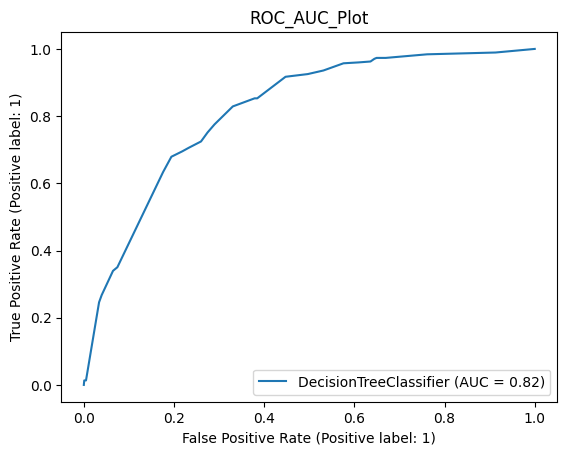

In [139]:

model(classifier_dt,x_train_dt,y_train_dt,x_test_dt,y_test_dt)

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1035
           1       0.57      0.63      0.60       374

    accuracy                           0.77      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.77      0.78      1409



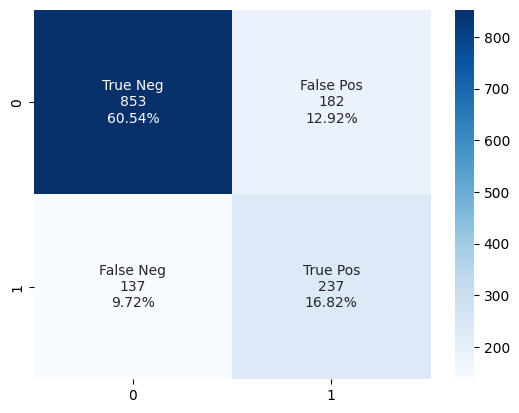

In [140]:

model_evaluation(classifier_dt,x_test_dt,y_test_dt)

### Random Forest

In [141]:
x_train_rf = x_train_randomUnderSampler.copy()
y_train_rf = y_train_randomUnderSampler.copy()
x_test_rf = x_test_randomUnderSampler.copy()
y_test_rf = y_test_randomUnderSampler.copy()

In [142]:
classifier_rf = RandomForestClassifier(criterion='entropy', min_samples_leaf=3,min_samples_split=5, 
                            n_estimators=200, random_state=0)

Cross Validation Score :  84.41%
ROC_AUC Score :  68.65%


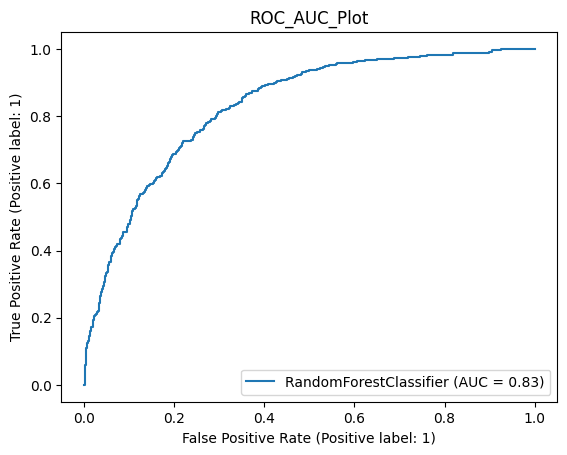

In [143]:
model(classifier_rf,x_train_rf,y_train_rf,x_test_rf,y_test_rf)



              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.47      0.54       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409



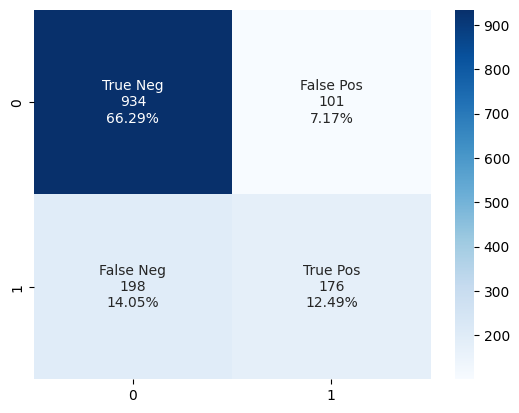

In [144]:
model_evaluation(classifier_rf,x_test_rf,y_test_rf)


### Logistic Regression Classification implementation

Logistic regression includes following functions:

- Sigmoid function
- Cost function
- Gradient descent function. This function returns the best parameters that minimizes our cost function.
- Predict function for predicting churn. When our sigmoid function outputs a value more than or equal to 0.5, it will output 1 for "Yes", and if the value is less than 0.5, it will output "0" for "No".

In [145]:
x_train_lr = x_train_randomUnderSampler.copy()
y_train_lr = y_train_randomUnderSampler.copy()
x_test_lr = x_test_randomUnderSampler.copy()
y_test_lr = y_test_randomUnderSampler.copy()

In [146]:
# logistic function = sigmoid function
def sigmoid(z):
    g = 1 / (1 + (np.exp(-z)))
    return g

# costFunction with regularization
def costFunction(theta, x, y, l):
    #initializing terms
    m = len(x)
    h = sigmoid(x.dot(theta.reshape(-1,1)))
    #cost function
    J = (1 / m) * (-y.transpose().dot(np.log(h)) - (np.subtract(1, y)).transpose().dot(np.log(1-h))) + ( l / (2*m)) * np.sum(np.power((theta[1:]), 2))
    return(J[0])

# to minimize my cost, I used Gradient Descent just like in Linear Regression implementation.
def gradDescent(theta, x, y, l): 
    #setting variables m
    m = len(x)
    h = sigmoid(x.dot(theta.reshape(-1,1)))
    #grad = (1/m) * x.transpose().dot(h - y) + (np.sum(((l / m) * theta[1:])))
    grad = (1/m) * x.transpose().dot(h - y.reshape(-1,1)) + (np.sum(((l / m) * theta[1:])))

    grad[0] = 0
    return(grad.flatten())

In [147]:
# introducting polynomial features to our dataset
# I see that this method generally used before applying logistic regression


poly = PolynomialFeatures(2)

x_train_lr = poly.fit_transform(x_train_lr)
x_test_lr = poly.fit_transform(x_test_lr)


#Set regularization parameter lambda
l = 0.01

#adding intercept term to x_train set    
intercept = np.ones((x_train_lr.shape[0], 1))
x_train_lr = np.hstack((intercept, x_train_lr))

#initializing theta
initial_theta = np.random.rand(x_train_lr.shape[1], 1)

#finding optimum parameters with fmin_bfgs
#import scipy.optimize


optimized_theta = scipy.optimize.fmin_bfgs(costFunction, fprime = gradDescent, x0 = initial_theta, args=(x_train_lr, y_train_lr.ravel(), l))
optimized_theta

         Current function value: 0.394951
         Iterations: 446
         Function evaluations: 530
         Gradient evaluations: 518


array([ 1.64799918e-01, -1.21518864e-01,  3.19152282e-01,  1.75029728e-01,
        1.65911025e-01, -1.38415764e-01, -5.30812131e+00, -4.06549482e-02,
        4.83067210e-02,  1.21684415e+00, -1.35318264e+00, -1.21756028e+00,
       -8.83140154e-01, -1.39583193e+00, -7.30068488e-01, -5.67015831e-01,
       -2.21583600e+00,  4.59518181e-01,  4.81553859e-01, -8.73572934e-01,
       -1.75073658e+00, -1.59746978e-01, -1.37654368e-01,  7.32071954e-03,
       -1.47365618e-01, -1.42598785e+00,  1.99824955e-01,  2.86346666e-01,
       -2.75248770e-01, -4.54937901e-01,  4.31676896e-02, -5.61664118e-02,
       -2.60138372e-01,  1.06520026e-01, -4.25033997e-02,  3.38016689e-01,
       -4.93602181e-02,  3.38388792e-01, -8.96739784e-01,  2.67587660e+00,
        9.85083751e-02,  2.47624244e-01, -6.03309799e-01,  2.29578246e-01,
        5.25907976e-01,  3.07508775e-01, -6.21279920e-01,  2.20559799e-01,
        3.02194066e-02, -1.33314155e-01, -1.75702666e-01, -7.47004746e-02,
        8.43091527e-02, -

In [148]:
#creating our predict function for logistic regression
def predict(theta, x):
    # When our sigmoid function output value more than or equal to 0.5, it will output 1 for "Yes",
    # and if the value is less than 0.5, it will output "0" for "No".
    h = sigmoid(x.dot(theta.reshape(-1,1)))
    p = np.zeros((x.shape[0],1))

    for i in range(0, h.shape[0]):
        if h[i] >= 0.5:
            p[i,0] = 1
        else:
            p[i,0] = 0
    return p

y_pred = predict(optimized_theta, x_train_lr)

#adding intercept term
intercept = np.ones((x_test_lr.shape[0], 1))
x_test_lr = np.hstack((intercept, x_test_lr))

y_cv = predict(optimized_theta, x_test_lr)


### Evaluate implemented model :

In [149]:

print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_train_lr, y_pred)))

#classification report for cross validation set
print(classification_report(y_train_lr, y_pred)) 



ROC_AUC Score :  73.32%
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4139
           1       0.68      0.56      0.62      1495

    accuracy                           0.81      5634
   macro avg       0.77      0.73      0.75      5634
weighted avg       0.81      0.81      0.81      5634

